In [1]:
# coding: utf-8

# our all
import numpy as np
import pandas as pd

# usefull pandas settings
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)

# for API working and current time
import requests
import datetime

# chess pgn-reading tool
from pgn_parser import pgn, parser

# multistreaming
import threading

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [2]:
user_list=['andreyvict', 'sever043', 'Rosolimo']
user=user_list[2]

In [3]:
user

'Rosolimo'

In [21]:
df=pd.read_csv('data/cur_user.csv')
df=df[df['target_user']==user]

In [22]:
df.sample(4)

,Unnamed: 0,rules,time_class,time_control,rated,game,result,date,time,period,white.username,black.username,white.rating,black.rating,white.result,black.result,white.score,black.score,white_elo_forecast,black_elo_forecast,eco,eco_url,game_url,white_url,black_url,target_user,score,rating,opponent_rating,base_elo_forec,color,year,month
12651,0,chess,blitz,300,True,1,0-1,2016-05-25,12:23:11,2016-5,Rosolimo,FraKub138,1638,1627,resigned,win,0.0,1.0,0.515825,0.484175,A43,https://www.chess.com/openings/A43-Old-Benoni-Defense-2.d5-d6,https://www.chess.com/live/game/1591625434,https://api.chess.com/pub/player/rosolimo,https://api.chess.com/pub/player/frakub138,Rosolimo,0.0,1638,1627,0.515825,w,2016,5
23337,0,chess,blitz,300,True,1,1-0,2014-03-02,12:45:16,2014-3,fearplay,sydawgy,1350,1332,win,timeout,1.0,0.0,0.525881,0.474119,B01,https://www.chess.com/openings/B01-Scandinavian-Defense-Mieses-Kotroc-Variation-3.Nc3-Qd8,https://www.chess.com/live/game/740936573,https://api.chess.com/pub/player/fearplay,https://api.chess.com/pub/player/sydawgy,Rosolimo,0.0,1332,1350,0.474119,b,2014,3
17963,0,chess,blitz,180,True,1,1-0,2018-12-08,07:47:04,2018-12,bab2vb,stephen100,856,897,win,timeout,1.0,0.0,0.441269,0.558731,D04,https://www.chess.com/openings/D04-Colle-System,https://www.chess.com/live/game/3276853136,https://api.chess.com/pub/player/bab2vb,https://api.chess.com/pub/player/stephen100,Rosolimo,0.0,897,856,0.558731,b,2018,12
10203,0,chess,blitz,600,True,1,1-0,2016-11-13,19:39:24,2016-11,madrid7676,contoda,1250,1194,win,checkmated,1.0,0.0,0.579900,0.420100,B01,https://www.chess.com/openings/B01-Scandinavian-Defense,https://www.chess.com/live/game/1808632756,https://api.chess.com/pub/player/madrid7676,https://api.chess.com/pub/player/contoda,Rosolimo,0.0,1194,1250,0.420100,b,2016,11


In [23]:
df.groupby(['year', 'month']).sum()[['game', 'score', 'rating']].reset_index()

,year,month,game,score,rating
0,2012,9,95,55.0,128408
1,2013,5,254,138.0,334491
2,2013,6,110,49.0,148416
3,2013,9,576,275.0,778631
4,2013,10,284,137.5,412753
5,2013,11,318,159.0,483087
6,2013,12,415,196.5,621947
7,2014,1,355,182.5,548417
8,2014,2,294,132.5,448849
9,2014,3,961,433.5,1311274


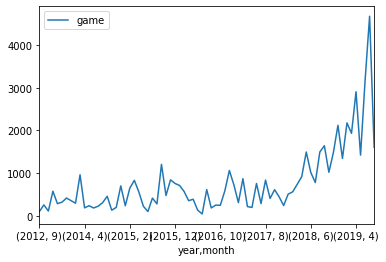

In [24]:
df.groupby(['year', 'month']).sum()[['game']].plot()

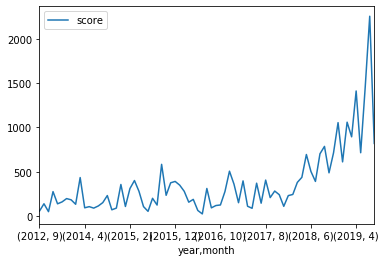

In [25]:
df.groupby(['year', 'month']).sum()[['score']].plot()

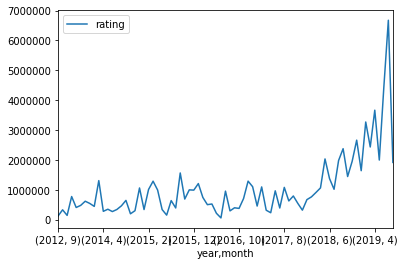

In [26]:
df.groupby(['year', 'month']).sum()[['rating']].plot()

In [27]:
w=df[(df['year']==2019)&(df['month']==8)]

In [28]:
w[0:3]

,Unnamed: 0,rules,time_class,time_control,rated,game,result,date,time,period,white.username,black.username,white.rating,black.rating,white.result,black.result,white.score,black.score,white_elo_forecast,black_elo_forecast,eco,eco_url,game_url,white_url,black_url,target_user,score,rating,opponent_rating,base_elo_forec,color,year,month
1006,0,chess,blitz,600,True,1,0-1,2019-08-02,09:54:05,2019-8,Pojiloy_Ariec,gelyes,793,1601,resigned,win,0.0,1.0,0.009460,0.990540,B09,https://www.chess.com/openings/B09-Pirc-Defense-Main-Line-Austrian-Attack-4...Bg7,https://www.chess.com/live/game/3914496860,https://api.chess.com/pub/player/pojiloy_ariec,https://api.chess.com/pub/player/gelyes,Rosolimo,1.0,1601,793,0.990540,b,2019,8
1007,0,chess,blitz,600,True,1,0-1,2019-08-04,09:11:35,2019-8,jhasudungan,Pojiloy_Ariec,875,803,resigned,win,0.0,1.0,0.602158,0.397842,C46,https://www.chess.com/openings/C46-Three-Knights-Opening,https://www.chess.com/live/game/3919790927,https://api.chess.com/pub/player/jhasudungan,https://api.chess.com/pub/player/pojiloy_ariec,Rosolimo,1.0,803,875,0.397842,b,2019,8
1008,0,chess,blitz,600,True,1,1-0,2019-08-05,16:52:04,2019-8,Pojiloy_Ariec,Den_nazarchuk,811,779,win,abandoned,1.0,0.0,0.545922,0.454078,B00,https://www.chess.com/openings/B00-Kings-Pawn-Opening,https://www.chess.com/live/game/3923394503,https://api.chess.com/pub/player/pojiloy_ariec,https://api.chess.com/pub/player/den_nazarchuk,Rosolimo,0.0,779,811,0.454078,b,2019,8
